In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from matplotlib.colors import ListedColormap

1) Спирт
2) Яблочная кислота
3) Зола
4) Щелочность золы
5) Магний
6) Общие фенолы
7) Флаваноиды
8) Нефлаваноидные фенолы
9) Проантоцианы
10) Интенсивность цвета
11) Оттенок
12) OD280/OD315 разбавленных вин
13) Пролин

https://chart-studio.plotly.com/dashboard/Alever:62/view

In [22]:
df = pd.read_csv("./archive/WineDataset.csv")
df

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

In [24]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normilized_values = scaler.fit_transform(df)

headers = df.columns
df = pd.DataFrame(normilized_values, columns=headers)


In [25]:
pd.DataFrame(df).to_csv("normilizesWine.csv", header=True, index=False)

In [26]:
df.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity of ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280/OD315 of diluted wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'Wine'}>, <Axes: >, <Axes: >]],
      dtype=object)

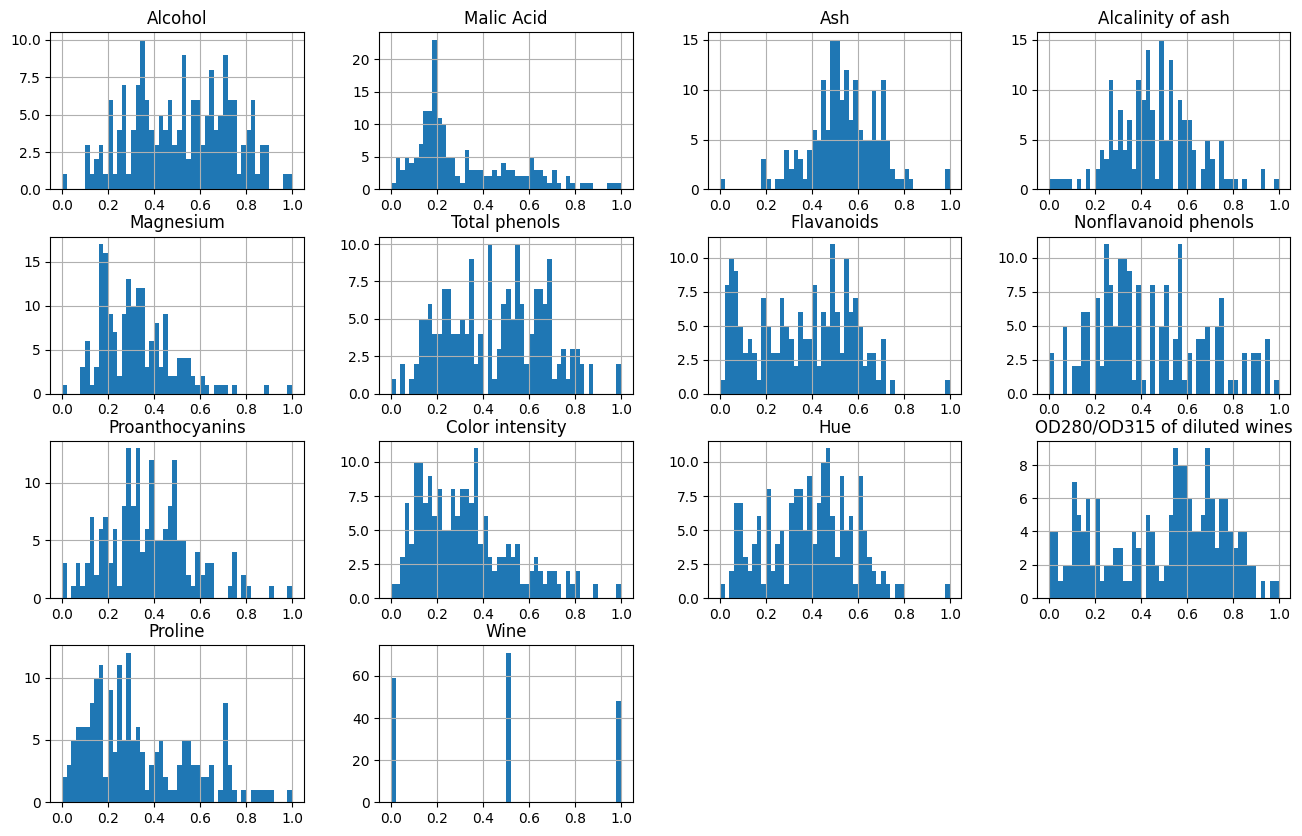

In [27]:
df.hist(figsize=(16, 10), bins=50)

Alcohol                            Axes(0.125,0.11;0.0466867x0.77)
Malic Acid                      Axes(0.181024,0.11;0.0466867x0.77)
Ash                             Axes(0.237048,0.11;0.0466867x0.77)
Alcalinity of ash               Axes(0.293072,0.11;0.0466867x0.77)
Magnesium                       Axes(0.349096,0.11;0.0466867x0.77)
Total phenols                    Axes(0.40512,0.11;0.0466867x0.77)
Flavanoids                      Axes(0.461145,0.11;0.0466867x0.77)
Nonflavanoid phenols            Axes(0.517169,0.11;0.0466867x0.77)
Proanthocyanins                 Axes(0.573193,0.11;0.0466867x0.77)
Color intensity                 Axes(0.629217,0.11;0.0466867x0.77)
Hue                             Axes(0.685241,0.11;0.0466867x0.77)
OD280/OD315 of diluted wines    Axes(0.741265,0.11;0.0466867x0.77)
Proline                         Axes(0.797289,0.11;0.0466867x0.77)
Wine                            Axes(0.853313,0.11;0.0466867x0.77)
dtype: object

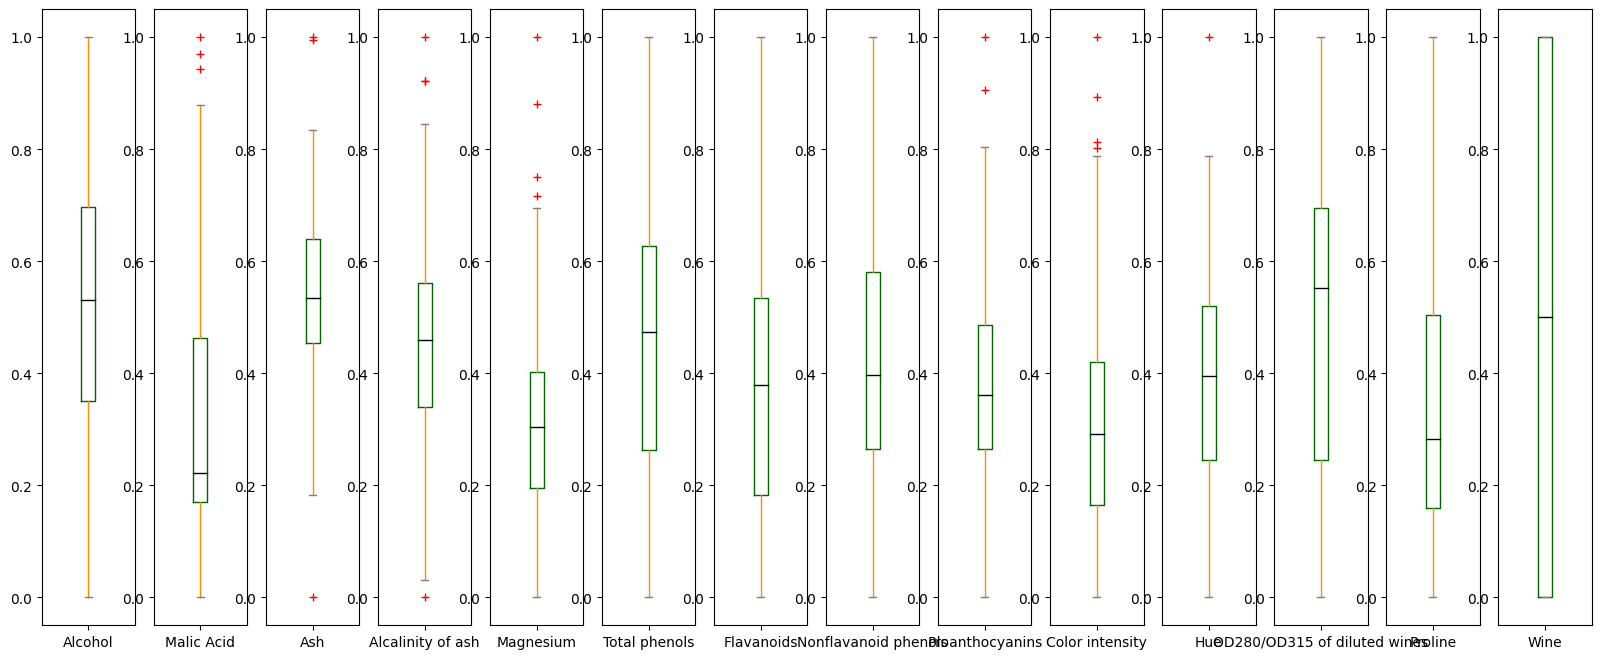

In [28]:
color = {
    "boxes": "DarkGreen",
    "whiskers": "DarkOrange",
    "medians": "Black",
    "caps": "Gray",
}

df.plot.box(color=color, sym="r+", figsize=(20, 8), subplots=True)

<Axes: >

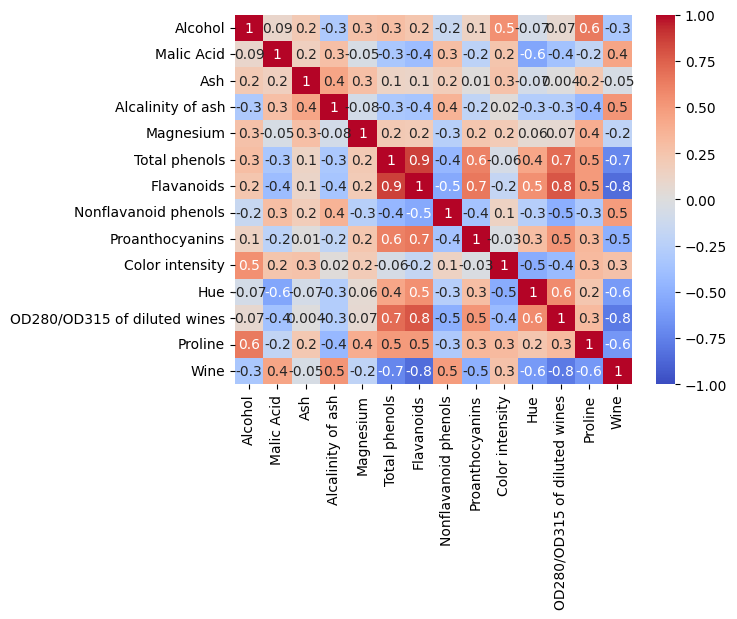

In [29]:
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', )

In [30]:
def df_to_matrix(df, list_of_indexes: list):
    matrix = np.matrix(df[list_of_indexes])
    right_shape_matrix = np.array(matrix)
    return right_shape_matrix

In [31]:
default_train_size = 0.4
default_random_state = 335066

def split(df, params_X, param_y):
    X = df_to_matrix(df, params_X)
    y = np.array(df[param_y])
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        train_size=default_train_size, 
        random_state=default_random_state
    )
    return X_train, X_test, y_train, y_test, X, y

In [32]:
def get_differents(X, y_test, y_predict):
    same_X = []
    same_y = []
    diff_X = []
    diff_y_test = []
    diff_y_predict = []
    for i in range(len(X)):
        if (y_test[i] != y_predict[i]):
            diff_X.append([X[i][0], X[i][1]])
            diff_y_test.append(y_test[i])
            diff_y_predict.append(y_predict[i])
        else:
            same_X.append([X[i][0], X[i][1]])
            same_y.append(y_test[i])
    return np.array(same_X), np.array(same_y), np.array(diff_X), np.array(diff_y_test), np.array(diff_y_predict)

In [41]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
cmap_predict = ListedColormap(['#FFAA00','#000000','#AA00DD'])

def graph(X, y):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap, s=20)
    plt.show()

def predictions_graph(X, y_test, y_predict):
    plt.figure()
    same_X, same_y, diff_X, diff_y_test, diff_y_predict = get_differents(X, y_test, y_predict)
    plt.scatter(same_X[:,0], same_X[:,1], c=same_y, cmap=cmap, s=20)
    plt.scatter(diff_X[:,0], diff_X[:,1], c=diff_y_predict, cmap=cmap_predict, s=20)
    plt.show()
    
def matrix_graph(TN, FP, FN, TP):
    min_value = min(TN, FP, FN, TP)
    max_value = max(TN, FP, FN, TP)
    sns.heatmap([[TN, FP], [FN, TP]], annot = True, fmt='.2g', vmin=min_value, vmax=max_value, center=0, cmap= 'coolwarm')

In [34]:
def accuracy(predictions, test):
    return np.sum(predictions == test) / len(test) 

In [35]:
def confusion_matrix(test, predictions, value):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for i in range(len(test)):
        if (test[i] == value and predictions[i] == value):
            TP += 1
        elif (test[i] == value and predictions[i] != value):
            FN += 1
        elif (test[i] != value and predictions[i] == value):
            FP += 1
        else:
            TN += 1 
    return TN, FP, FN, TP

def matrix_presicion(TP, FP):
    return TP / (TP + FP)

def matrix_accuracy(TN, FP, FN, TP):
    return (TP + TN) / (TP + TN + FP + FN)

def matrix_max_accuracy(test, predictions):
    max_accuracy = -1
    max_class = -1
    for mat_class in [0, 0.5, 1]:
        TN, FP, FN, TP = confusion_matrix(test, predictions, mat_class)
        if (matrix_accuracy(TN, FP, FN, TP) > max_accuracy):
            max_class = mat_class
            max_accuracy = matrix_accuracy(TN, FP, FN, TP)
    TN, FP, FN, TP = confusion_matrix(test, predictions, max_class)
    return TN, FP, FN, TP, max_class, max_accuracy

In [36]:
def euclidian_distance(x1, x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance

def  manhattan_distance(x1, x2):
    distance = np.sum(x1 - x2)
    return distance

def cosine_distance(x1, x2):
    cosine_distance_value = np.sum(x1 * x2) / (np.sum(x1**2) * np.sum(x2**2))
    distance = 1 - cosine_distance_value
    return distance

In [37]:
class KNN:
    def __init__(self, k=3, metric=euclidian_distance):
        self.k = k
        self.metric=metric
        
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
        
    
    def _predict(self, x):
        # compute distance
        distances = [self.metric(x, x_train) for x_train in self.X_train]
        
        # get closest k
        k_indices = np.argsort(distances)[:self.k]
        k_neares_labels = [self.y_train[i] for i in k_indices]
        
        # majoruty voye
        most_common = Counter(k_neares_labels).most_common()
        type = most_common[0][0]
        return type

In [38]:
def make_predictions(X_train, X_test, y_train, k_value, metric_input):
    clf = KNN(k=k_value, metric=metric_input)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return predictions

In [39]:
def main(params_X, param_y):
    for metric in [euclidian_distance, manhattan_distance, cosine_distance]:
        if (metric == euclidian_distance):
            print("Metric is euclidian_distance")
        elif (metric == manhattan_distance):
            print("Metric is manhattan distance")
        else:
            print("Metric is cosine distance")
        for k in [1, 3, 5, 7, 10, 12, 16, 20]:
            print("k =", k)
            X_train, X_test, y_train, y_test, X, y = split(df, params_X, param_y)
            predictions = make_predictions(X_train, X_test, y_train, k, metric)
            TN, FP, FN, TP, matrix_class, matrix_accuracy = matrix_max_accuracy(y_test, predictions)
            acc = accuracy(predictions, y_test)
            print("точность предсказаний =", round(acc, 3))
            print("точность предсказаний по матрице =", round(matrix_accuracy, 3))
            matrix_graph(TN, FP, FN, TP)
            predictions_graph(X_test, y_test, predictions)  
            print()
            print()
        print()
        print()
        

Metric is euclidian_distance
k = 1
точность предсказаний = 0.869
точность предсказаний по матрице = 0.991


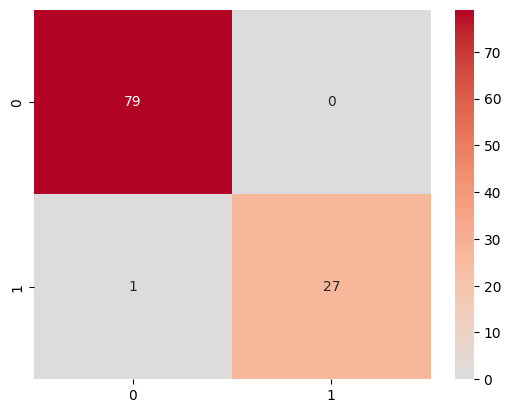

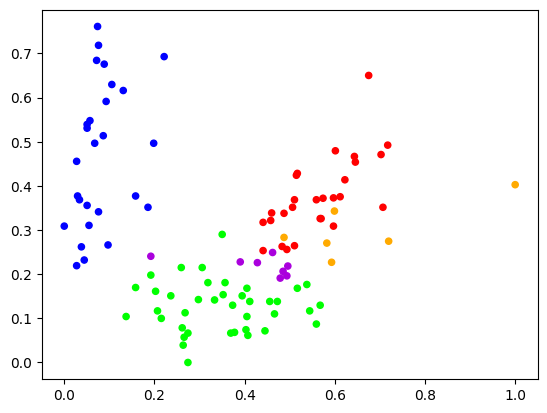



k = 3
точность предсказаний = 0.888
точность предсказаний по матрице = 0.981


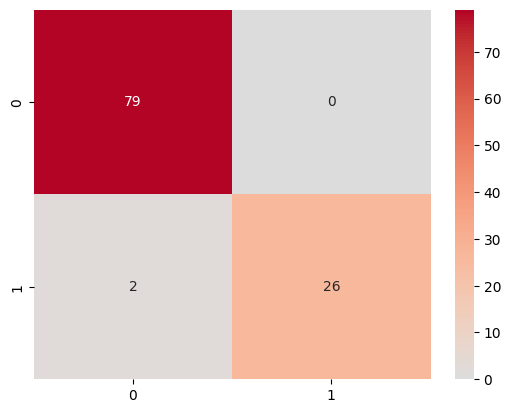

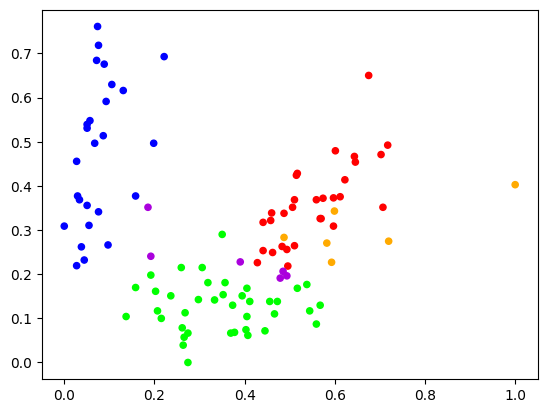



k = 5
точность предсказаний = 0.897
точность предсказаний по матрице = 0.991


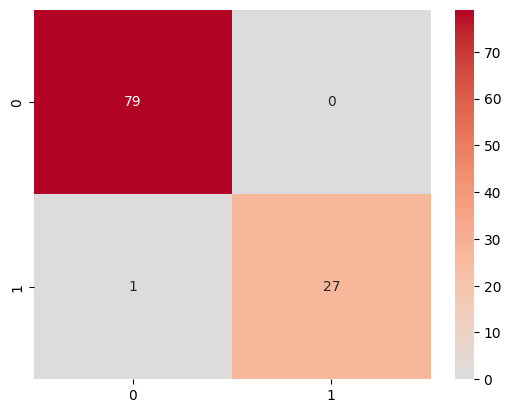

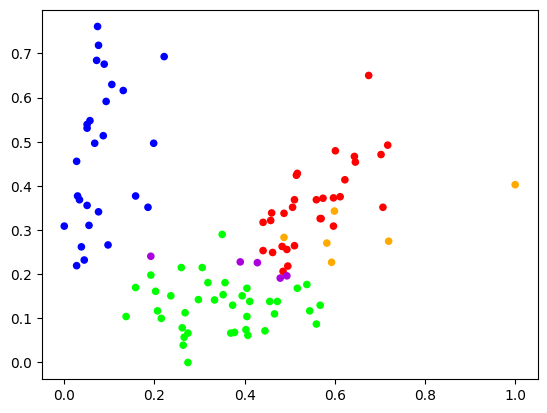



k = 7
точность предсказаний = 0.897
точность предсказаний по матрице = 0.991


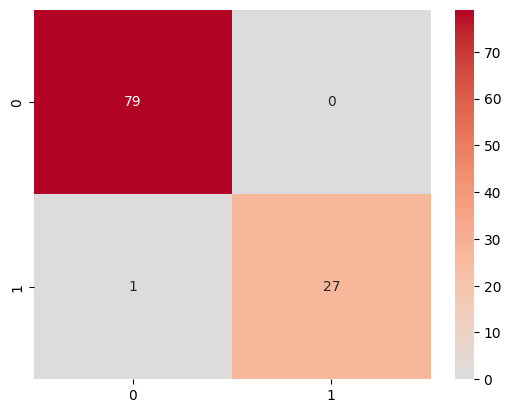

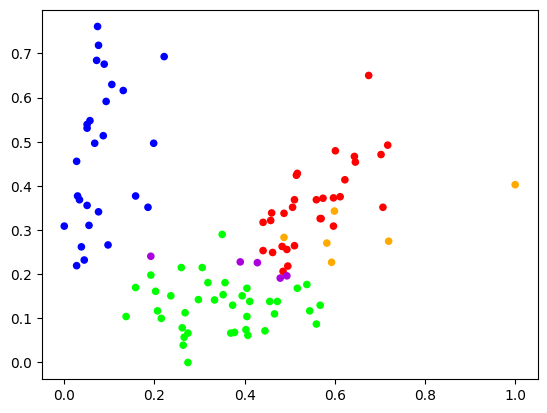



k = 10
точность предсказаний = 0.888
точность предсказаний по матрице = 0.991


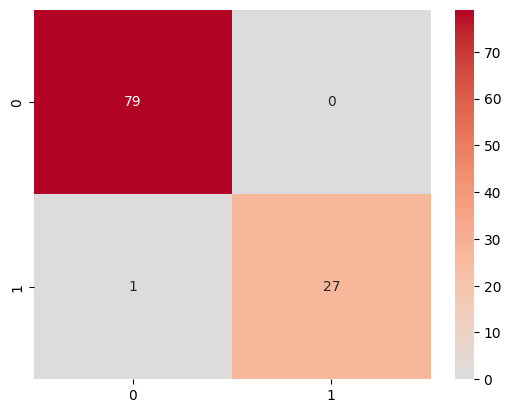

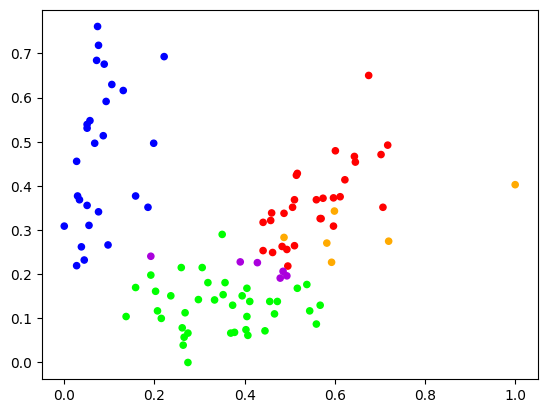



k = 12
точность предсказаний = 0.888
точность предсказаний по матрице = 0.991


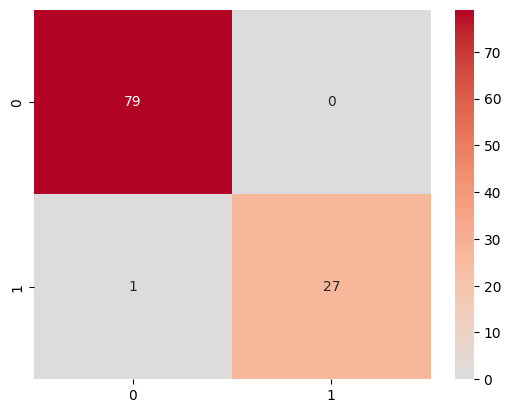

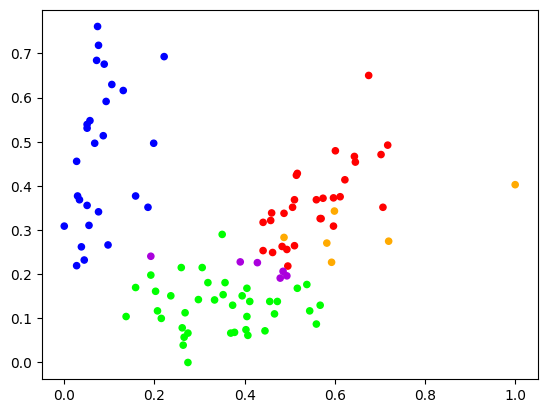



k = 16
точность предсказаний = 0.832
точность предсказаний по матрице = 0.944


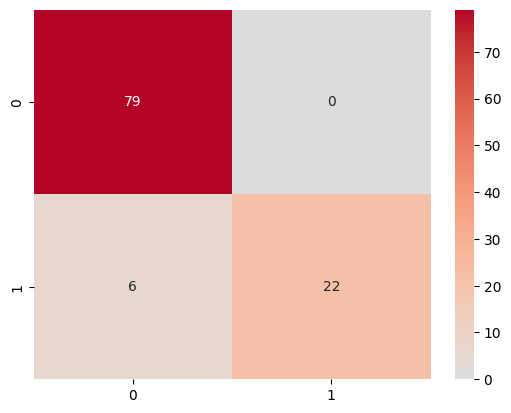

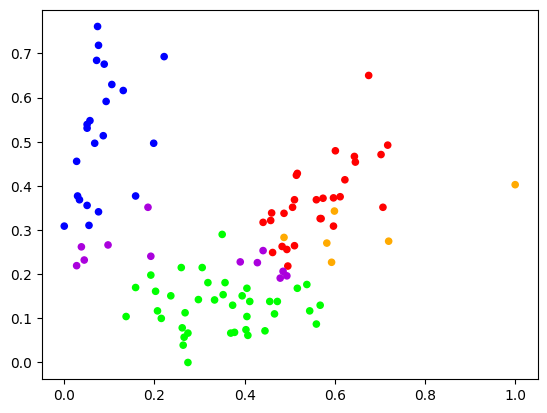



k = 20
точность предсказаний = 0.822
точность предсказаний по матрице = 0.944


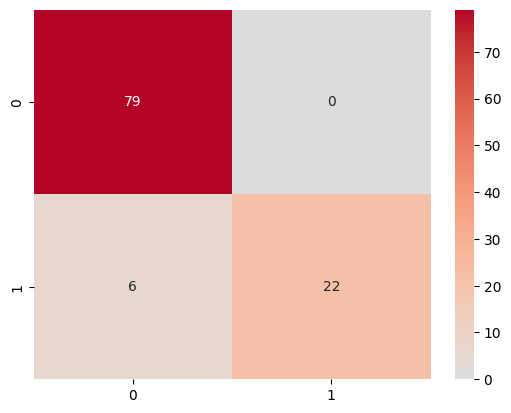

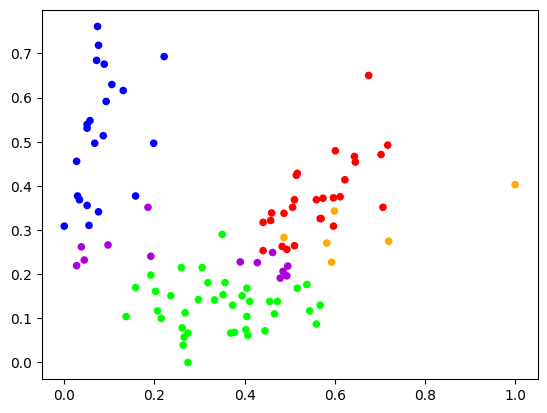





Metric is manhattan distance
k = 1
точность предсказаний = 0.318
точность предсказаний по матрице = 0.738


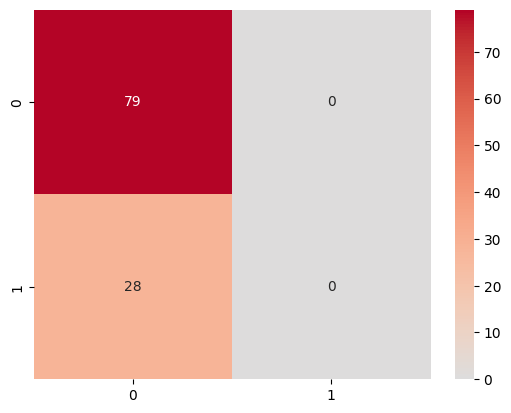

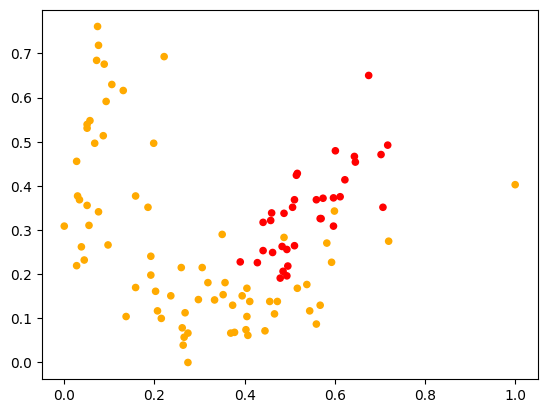



k = 3
точность предсказаний = 0.318
точность предсказаний по матрице = 0.738


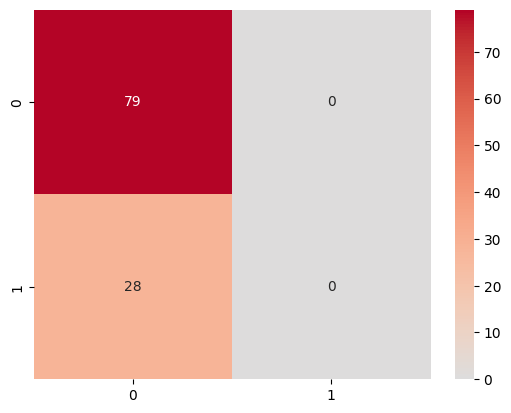

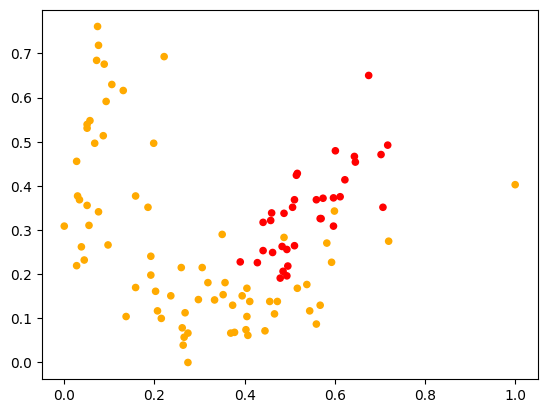



k = 5
точность предсказаний = 0.318
точность предсказаний по матрице = 0.738


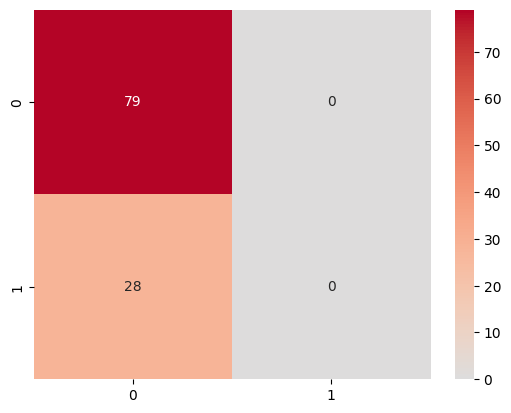

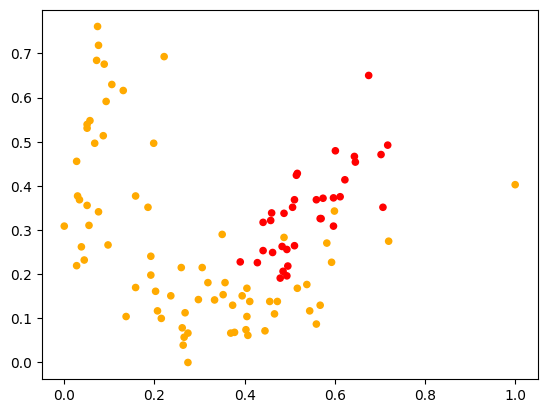



k = 7
точность предсказаний = 0.318
точность предсказаний по матрице = 0.738


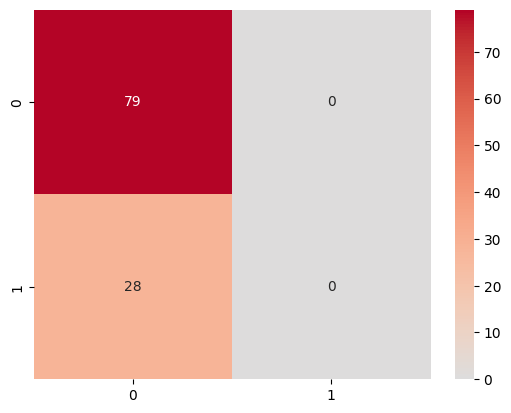

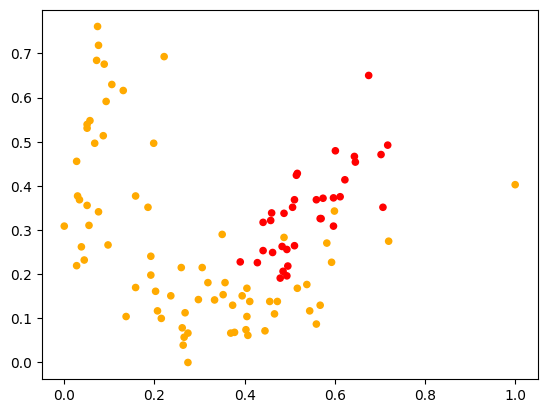



k = 10
точность предсказаний = 0.318
точность предсказаний по матрице = 0.738


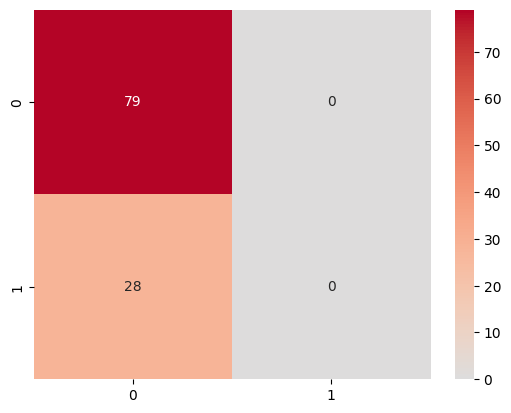

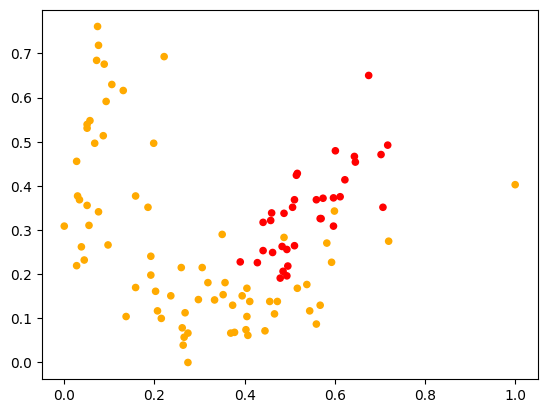



k = 12
точность предсказаний = 0.318
точность предсказаний по матрице = 0.738


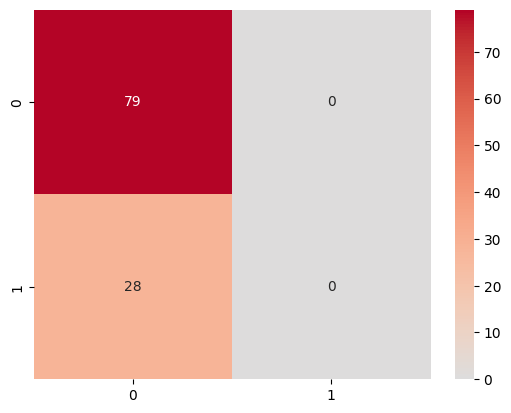

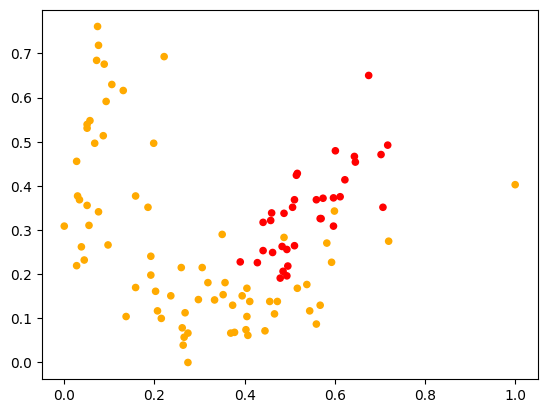



k = 16
точность предсказаний = 0.318
точность предсказаний по матрице = 0.738


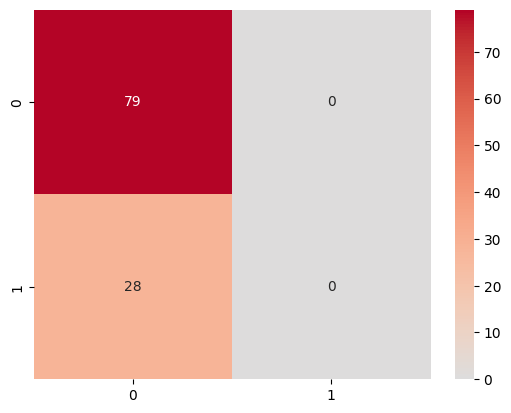

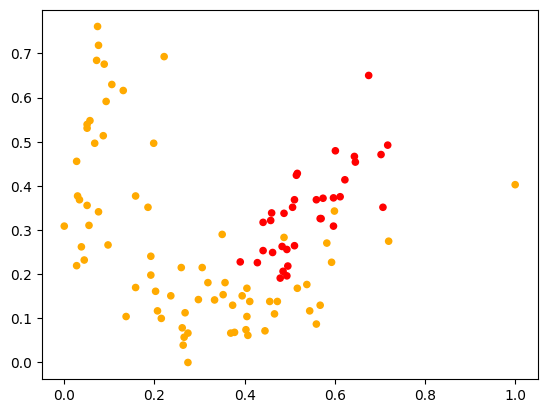



k = 20
точность предсказаний = 0.318
точность предсказаний по матрице = 0.738


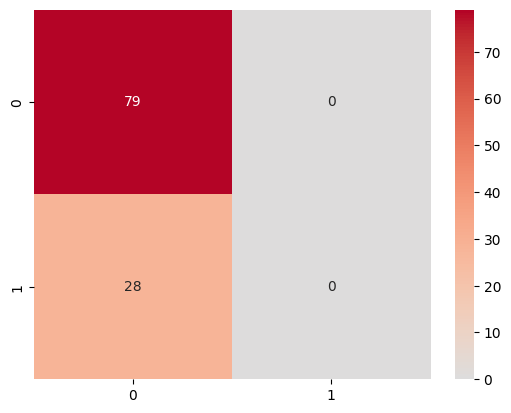

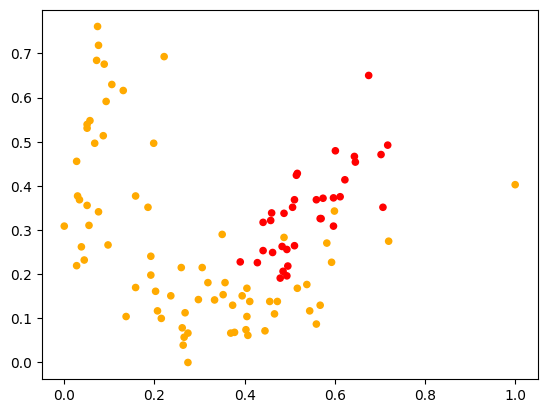





Metric is cosine distance
k = 1
точность предсказаний = 0.421
точность предсказаний по матрице = 0.738


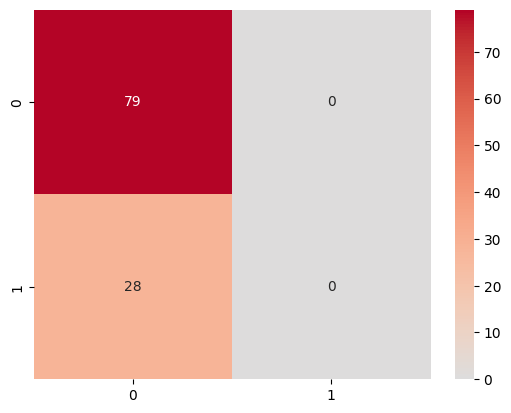

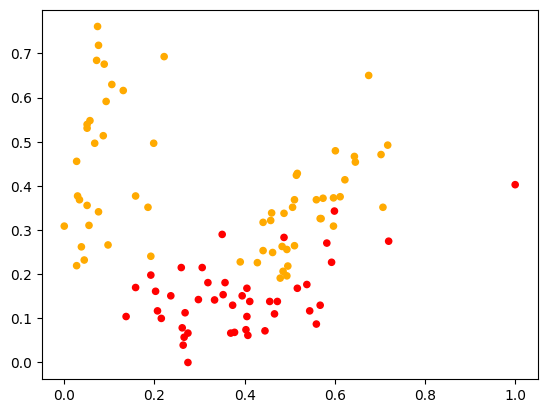



k = 3
точность предсказаний = 0.421
точность предсказаний по матрице = 0.738


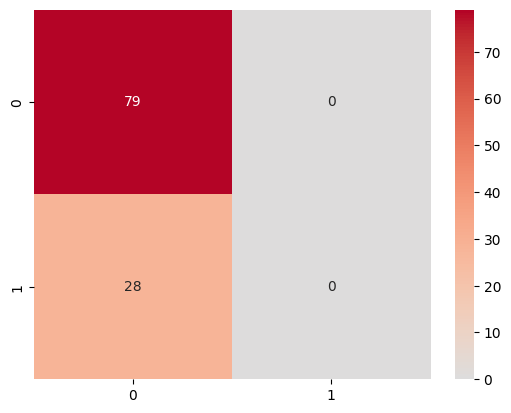

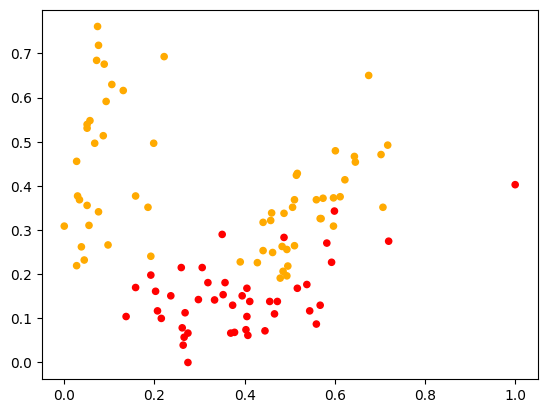



k = 5
точность предсказаний = 0.439
точность предсказаний по матрице = 0.757


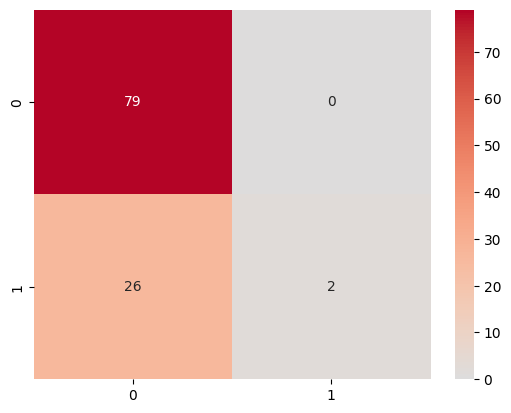

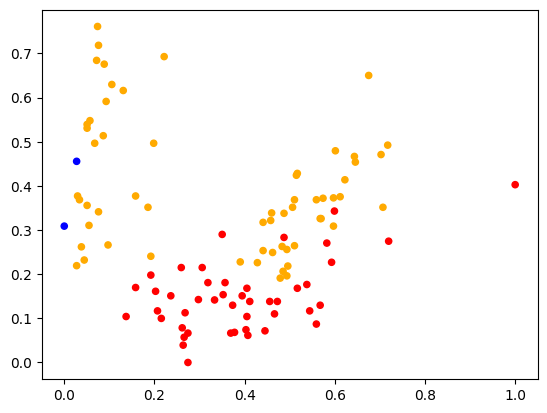



k = 7
точность предсказаний = 0.514
точность предсказаний по матрице = 0.832


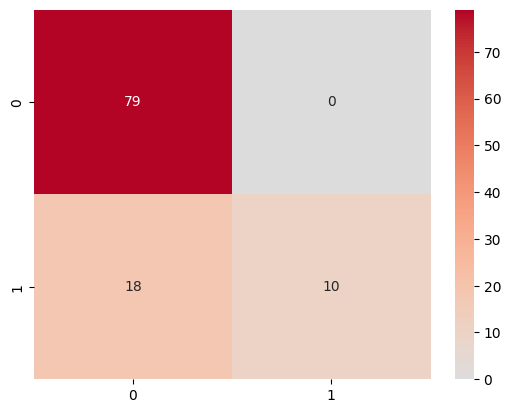

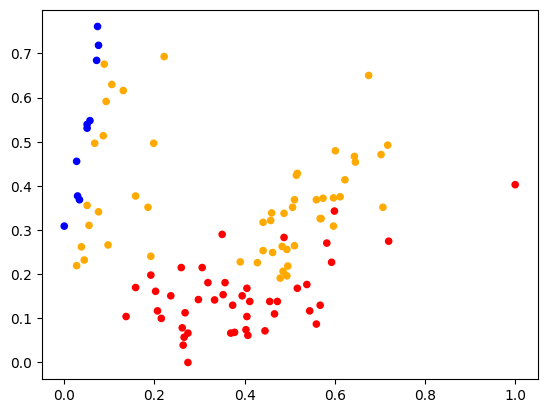



k = 10
точность предсказаний = 0.636
точность предсказаний по матрице = 0.953


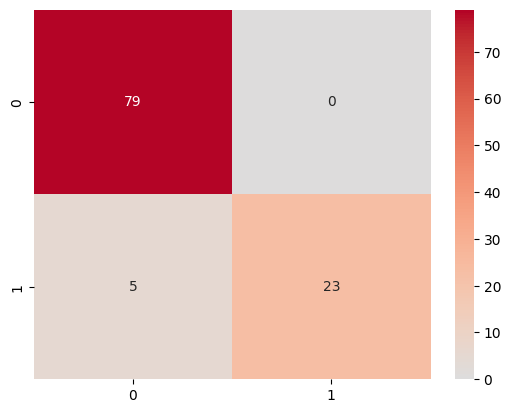

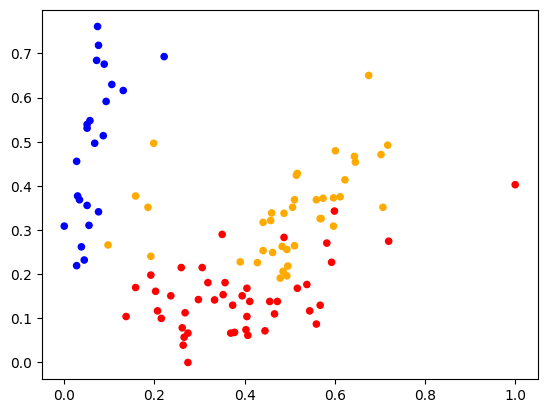



k = 12
точность предсказаний = 0.421
точность предсказаний по матрице = 0.738


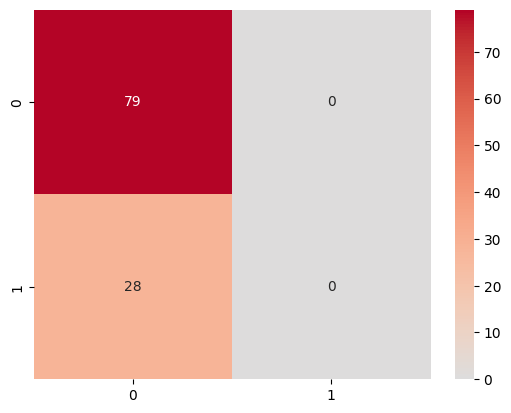

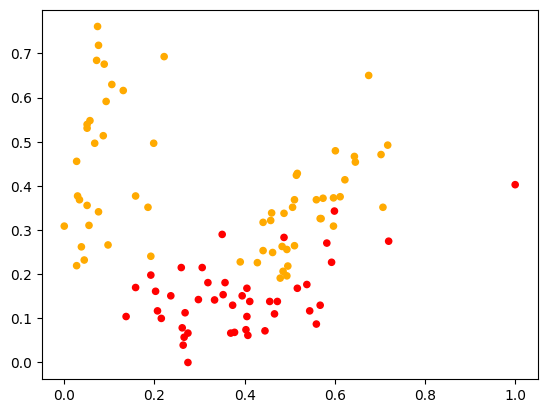



k = 16
точность предсказаний = 0.533
точность предсказаний по матрице = 0.85


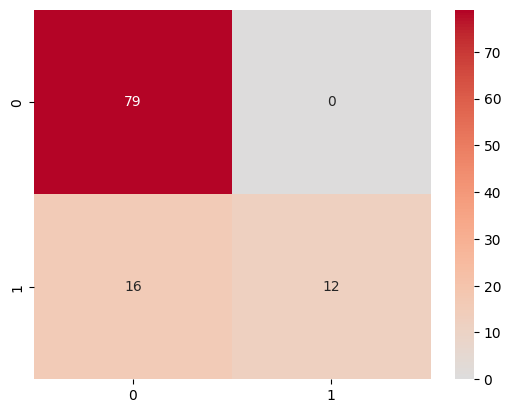

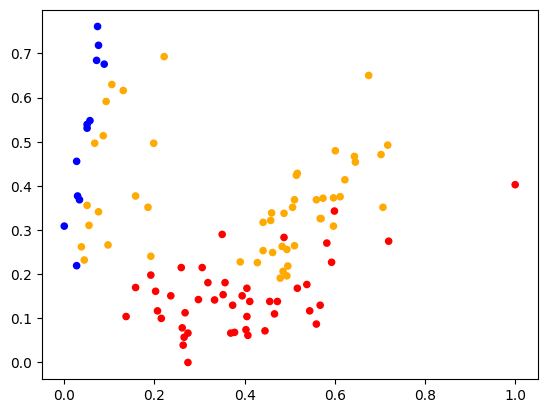



k = 20
точность предсказаний = 0.43
точность предсказаний по матрице = 0.748


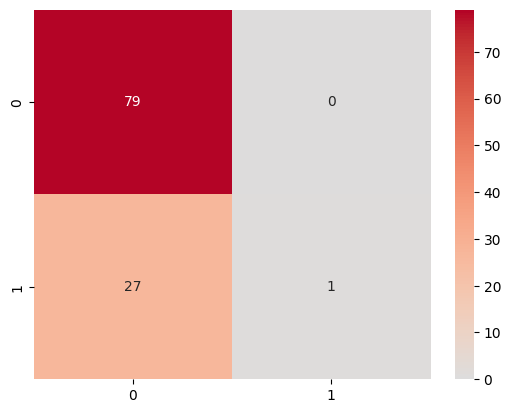

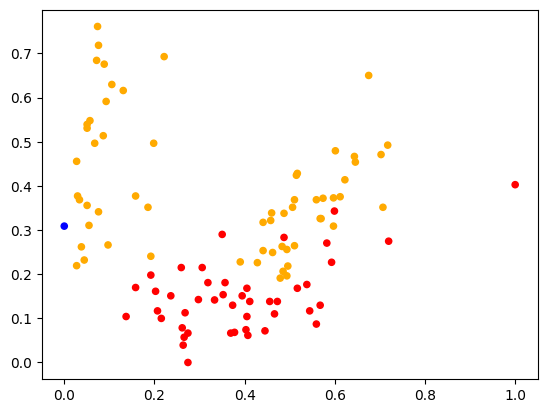

In [42]:
params_X = ["Flavanoids", "Color intensity"]
param_y = "Wine"

main(params_X, param_y)